<a href="https://colab.research.google.com/github/ChoudhuryRatnadip/explore_california/blob/master/M1_AST_07_Data_Visualization_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 7: Data Visualization 

## Learning Objectives

 At the end of the experiment, you will be able to:

* understand the importance of data visualization.
* implement data visualization using different ways.
* visualize the outliers in a dataset.
* implement the different types of graphs and charts.

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2200037" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9945560284" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M1_AST_07_Data_Visualization_C" #name of the notebook
def setup():
#  ipython.magic("sx pip3 install torch")  
    ipython.magic("sx wget -q https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/data.csv")  
    ipython.magic("sx wget -q https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/iris.csv")
    ipython.magic("sx wget -q https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Hitters.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing required packages

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Importing data as Pandas dataframe**

Seaborn is a data visualization library built on top of matplotlib and closely integrated with pandas data structures in Python.

In this section, we will import a dataset from seaborn. 

In [5]:
# Loading data
data = sns.load_dataset('tips')

 **01.** For the given dataset, perform the following:

1. Display first 5 and last 5 entries from the dataset
2. Plot a Univariate Distribution for `'total_bill'` from dataframe using distplot()

**Hint:** The **`distplot()`** function provides a quick look at univariate distribution. This function will plot a histogram that fits the kernel density estimate of the data

In [6]:
# Displaying first five entries
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# Displaying last five entries
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


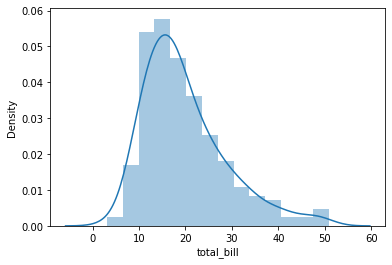

In [8]:
# Plotting the graph
sns.distplot(data["total_bill"])

**02.** Plot a FacetGrid for both male and female records with `"total_bill"` and `"tip"` in X and Y axis respectively

**Hint:** Take hue as `"smoker"`

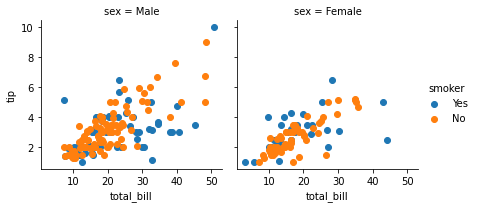

In [9]:
# Plotting the graph
grid = sns.FacetGrid(data, col= 'sex', hue = 'smoker')
grid = grid.map(plt.scatter, 'total_bill',"tip")
grid.add_legend()


**03.** Plot a Histogram for the columns `"total_bill", "size", "tip"` 


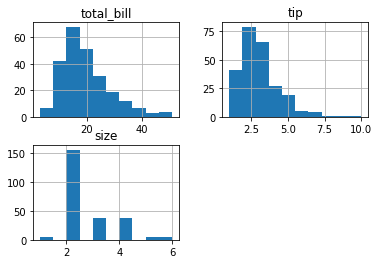

In [10]:
# Plotting the graph
data.hist()
plt.show()

 **04.** Perform scatter plot with

  * X-label = `'total_bill'`
  * Y-label = `'tip'`
  * Title = "Scatter Plot"

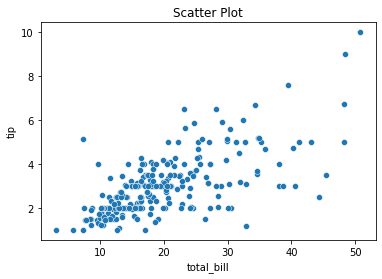

In [11]:
# Plotting the graph
plt.title("Scatter Plot")
sns.scatterplot(x="total_bill",y="tip",data=data)
plt.show()

**05.** Visualize pairwise relationship with a **pairplot()**

**Hint:** Take hue as `"smoker"`

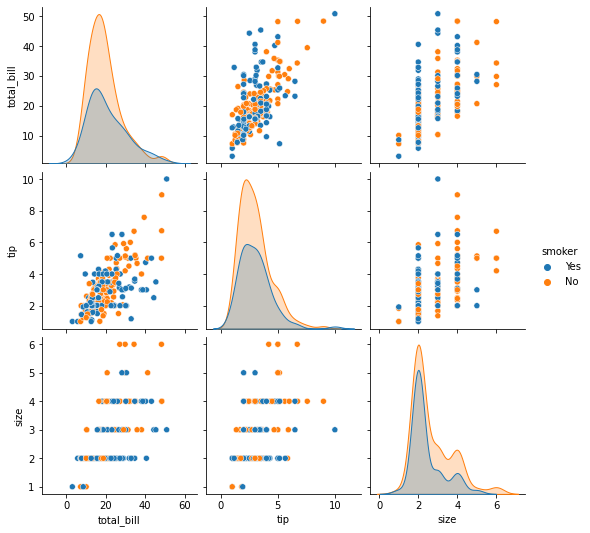

In [12]:
# Plotting the graph
sns.pairplot(data,hue="smoker")

**06.** Visualize a **Strip Plot** with
 
  * X-label = `'day'`
  * Y-label = `'total_bill'`
  * Title = "Strip Plot"

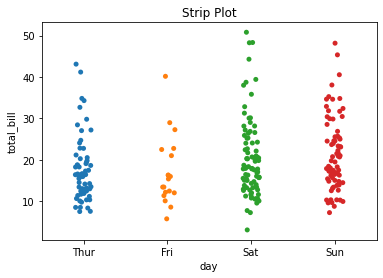

In [13]:
# Plotting the graph
plt.title("Strip Plot")
sns.stripplot(x = 'day',y = 'total_bill',data=data)

**07.** From the given dataset, visualize a combined plot of both **stripplot and the boxplot** to view the outliers with

 * X-label = `'day'` 
 * Y-label = `'total_bill'`
 * Title = "Strip and Box Plot"

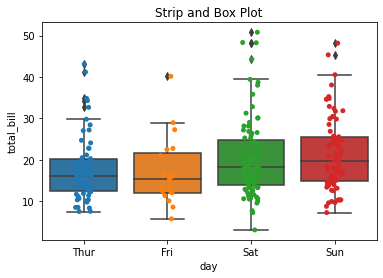

In [14]:
# Plotting the graph
plt.title("Strip and Box Plot")
sns.stripplot(x = 'day',y = 'total_bill',data=data)
sns.boxplot(x = 'day',y = 'total_bill',data=data)

**08.** Display violinplot with 
* X-label =`'day'`
* Y-label=`'total_bill'`

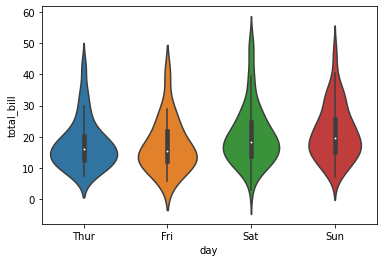

In [15]:
# Plotting the graph
sns.violinplot(x = 'day',y = 'total_bill',data=data)

**09.** Draw a barplot with
* X-label =`'day'`
* Y-label=`'total_bill'`

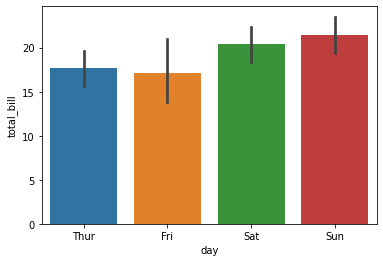

In [16]:
# Plotting the graph
sns.barplot(x = 'day',y = 'total_bill',data=data)
plt.show()

**10.** Plot **`lmplot()`** with
* X-label =`'tip'`
* Y-label=`'total_bill'`

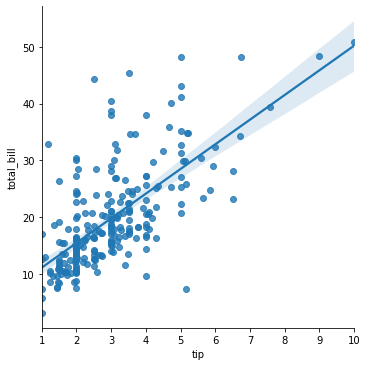

In [17]:
# Plotting the graph
sns.lmplot(x = 'tip',y = 'total_bill',data=data)

**11.** Display a Bivariate Distribution using a **`jointplot()`** with
* X-label =`'tip'`
* Y-label=`'total_bill'`

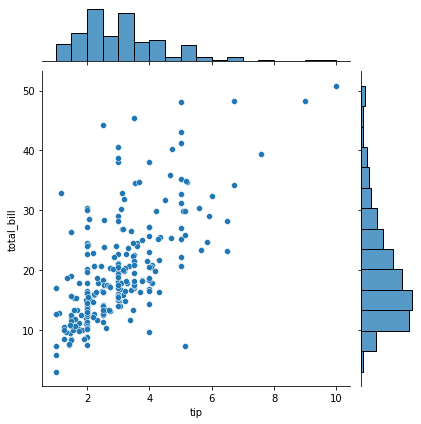

In [18]:
# Plotting the graph
sns.jointplot(x = 'tip',y = 'total_bill',data=data)

**12.** For the below-given **`uniform_data`**, plot a **HeatMap**

uniform_data = np.random.rand(10, 12)

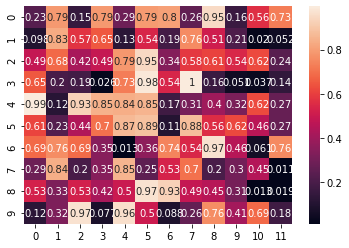

In [19]:
# Defining the data
uniform_data = np.random.rand(10, 12)
# Plotting the graph
sns.heatmap(uniform_data, annot = True)

#Breast Cancer Visualization. 

Here we use various visualization tools such as scatter plot, heatmap to get a better understanding of visualization by using a Breast Cancer dataset. This dataset has 569 records and we supposed view those records with Benign tumors and those with Malignant tomors.

Read the Breast Cancer dataset and see if there are any empty (NaN, NAN, na) or missing values in every column or attribute in the dataset.

In [20]:
df1 = pd.read_csv('data.csv')
df1.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Count the number of rows and columns (attributes) in the dataset.

In [21]:
df1.shape

(569, 32)

Get a count of the number of the number of Malignant (M) or Benign (B) cells and visualize the count.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


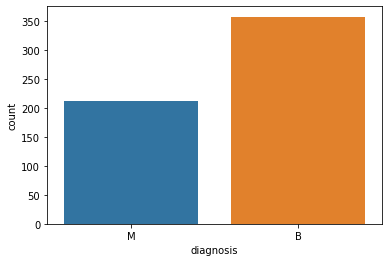

In [22]:
df1['diagnosis'].value_counts()
sns.countplot(df1['diagnosis'], label = 'count')

Look at the data types to see which columns need to be encoded. 

In [23]:
df1.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Encode the categorical data values

In [24]:
df1.iloc[:, 1].values

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [26]:
from sklearn.preprocessing import LabelEncoder

labelencoder_Y = LabelEncoder()
df1.iloc[:, 1] = labelencoder_Y.fit_transform(df1.iloc[:,1].values)

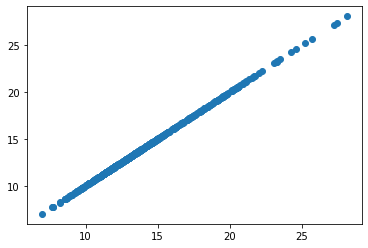

In [27]:
plt.scatter(df1['radius_mean'], df1['radius_mean'])

Create a pair plot

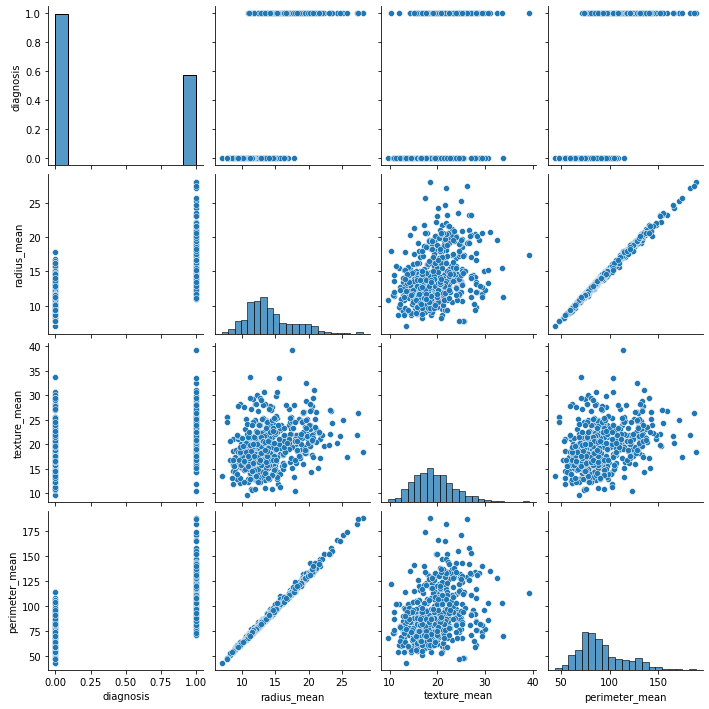

In [28]:
sns.pairplot(df1.iloc[:,1:5])

Create a pair plot and see the diagnosis points

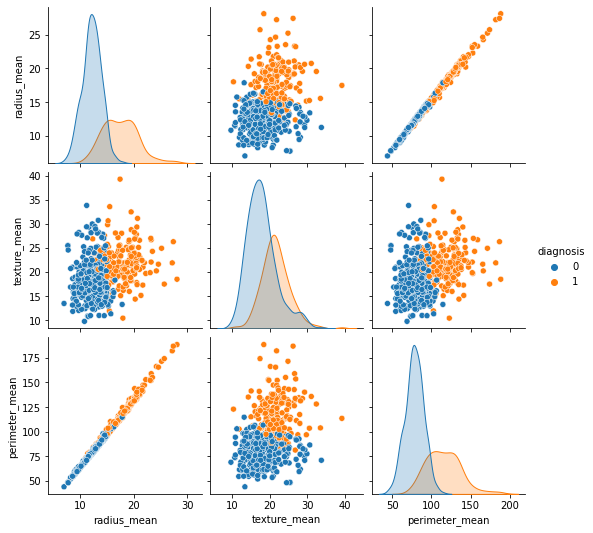

In [29]:
sns.pairplot(df1.iloc[:,1:5], hue = 'diagnosis') 

Find out the correlation between the columns/attributes

In [30]:
df1.iloc[:, 1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


Plot a HeatMap to visualize the correlation.

Heatmaps are the graphical representation of data where each value is represented in a matrix with different color coding. Mostly heatmaps are used to find correlations between various data columns in a dataset.

Note that variables with 100% correlations follow a perfectly linear relation as can be seen from the scatter plot above.


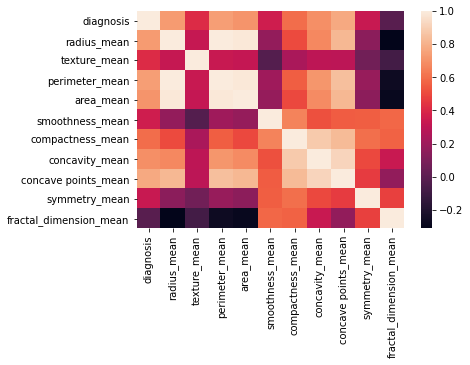

In [31]:
sns.heatmap(df1.iloc[:,1:12].corr())

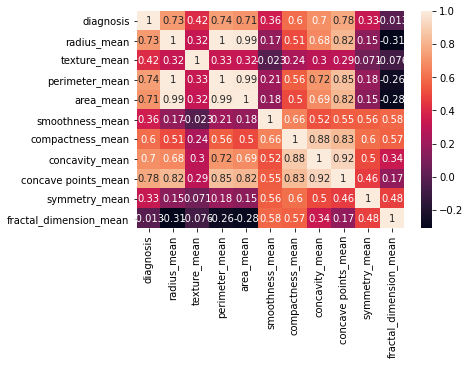

In [32]:
sns.heatmap(df1.iloc[:,1:12].corr(), annot = True)

Resize the heatmap

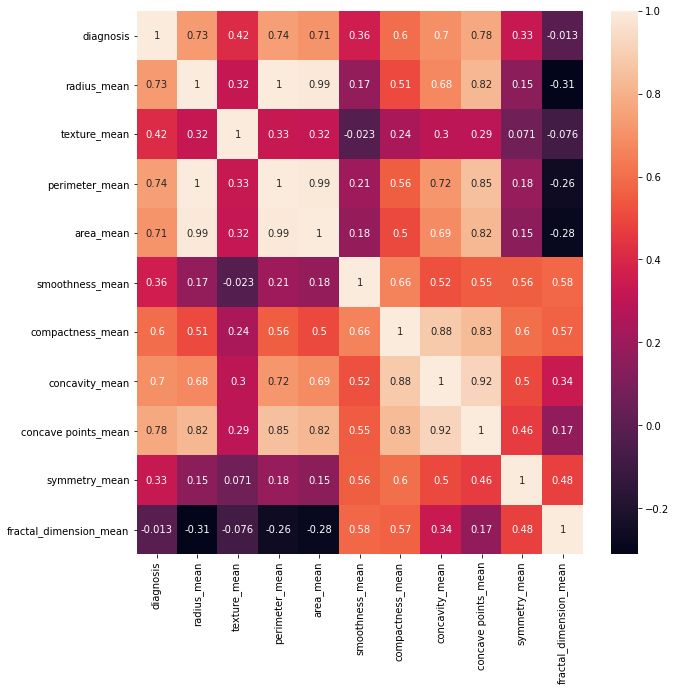

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.iloc[:,1:12].corr(), annot = True)

Express correlation as a percentage

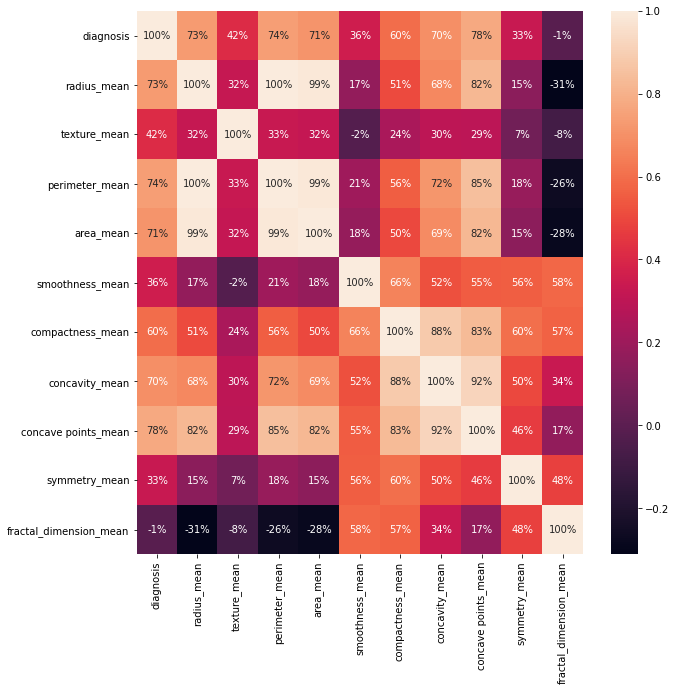

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.iloc[:,1:12].corr(), annot = True,fmt='0.0%')

**13.** From the given lists `sleeping, eating, working and playing` hours on a scale of five days, perform a Stackplot, with the following measures:
* Add colors to differentiate each list of data
* Place a Legend accordingly

days = [1,2,3,4,5]

sleeping =[7,8,6,11,7]

eating = [2,3,4,3,2]

working =[7,8,7,2,2]

playing = [8,5,7,8,13]

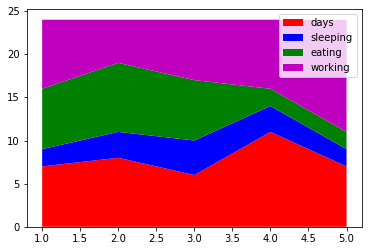

In [35]:
# Defining the data
days = [1,2,3,4,5]
sleeping =[7,8,6,11,7]
eating = [2,3,4,3,2]
working =[7,8,7,2,2]
playing = [8,5,7,8,13]

# Plotting the graph
plt.stackplot(days,sleeping, eating, working, playing,colors = ['r','b','g','m','w'],labels=['days','sleeping', 'eating', 'working', 'playing'])
plt.legend()
plt.show()

**14.** For the given DataFrame below, perform the following plots along Two Rows and Two Columns:
* Line Plot with following measures,
  * `marker = 'o', alpha = 0.4`
* Line Plot with following measutes,
  * `linestyle = 'none', marker='D', color="green", alpha=0.3`
* Scatter Plot with following measures,
  * `c = df['y'], alpha = 0.3`
* Scatter Plot with following measures,
  * `c = df['x'], alpha = 0.3`

DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101) }) 

In [37]:
# Defining the data
df = pd.DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101) }) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  after removing the cwd from sys.path.


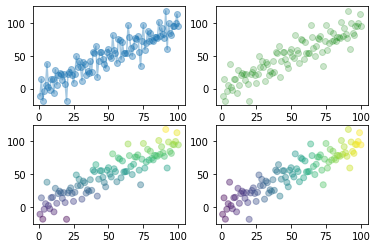

In [38]:
# Plotting the graph
fig, ax = plt.subplots(2,2)
ax[0,0].plot('x','y',data=df,marker="o",alpha=0.4)
ax[0,1].plot('x','y',data=df,linestyle="none", marker="o",color= "green",alpha=0.2)
ax[1,0].scatter('x','y',data=df,c= df['y'],alpha=0.4)
ax[1,1].scatter('x','y',data=df,c= df['x'],alpha=0.4)
plt.show()

**15.** For the given dictionary of IMDB Genres data, perform a Pie Plot with the following measures:
* **Explode** the 'Biography' Sliced section

IMDB_Genres = {

'Action': 133,

'Biography': 64,

'Comedy': 267,

'Sci-Fi': 32

}

In [39]:
# Defining the data
IMDB_Genres = {
    'Action': 133,
    'Biography': 64,
    'Comedy': 267,
    'Sci-Fi': 32
}

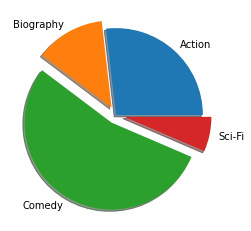

In [40]:
# Plotting the graph
plt.pie(IMDB_Genres.values(),explode=(.0,.1,.1,.1),shadow=True, labels= IMDB_Genres.keys())
plt.show()

**16.** For the given x, y, z values given below, perform a 3D Plot

z = np.linspace(0, 1, 100)

x = z * np.sin(20 * z)

y = z * np.cos(20 * z)

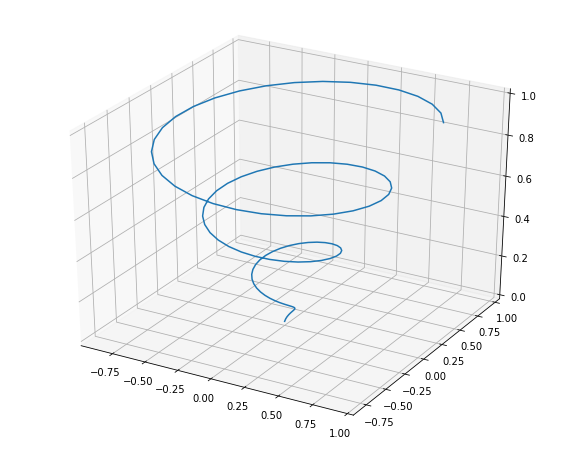

In [41]:
# Defining the data
z = np.linspace(0, 1, 100)
x = z * np.sin(20 * z)
y = z * np.cos(20 * z)

# Plotting the graph
plt.figure(figsize=(10,8))
ax = plt.axes(projection = '3d')
ax.plot3D(x,y,z)
plt.show()

**17.** For the X values below, do the following:
* Calculate the squares of X values and store it in y1 variable
* Calculate the Log to the Base 10 of X values and store it in y2 variable
* Plot the respective (X,y1) & (X, y2) as Sub-Plots Horizontally

X = np.arange(1,10)

y1= np.square(X)

y2=np.log10(X)


In [44]:
# Defining the data
X = np.arange(1,10)
y1= np.square(X)
y2=np.log10(X)


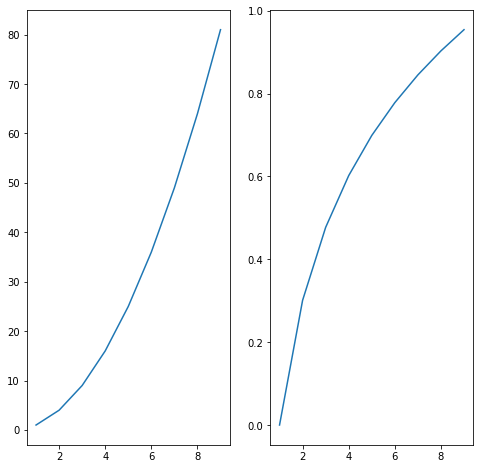

In [43]:
# Plotting the graph
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.plot(X,y1)

plt.subplot(122)
plt.plot(X,y2)
plt.show()

**18.** Plot parallel co-ordinates graph to IRIS dataset.

In [45]:
# Reading the data 
df = pd.read_csv( 'iris.csv' ) 

In [46]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Plotting the graph
pd.plotting.parallel_coordinates( df, 'Name', color=('#556270', '#4ECDC4', '#C7F464') )

**Tree based models**

**19.** Construct a simple regression tree for the Hitters dataset.

**Basics of decision trees - Hitters data**
We use the Hitters data set to predict a baseball player’s Salary based on Years (the number of years that he has played in the major leagues) and Hits (the number of hits that he made in the previous year).

We first remove observations that are missing Salary values, and log-transform Salary so that its distribution has more of a typical bell-shape. (Recall that Salary is measured in thousands of dollars.)

In [47]:
hitters = pd.read_csv('Hitters.csv')
hitters.dropna(axis=0, how='any', subset=['Salary'], inplace=True)
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


**Exploring and transforming the Hitters data set**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

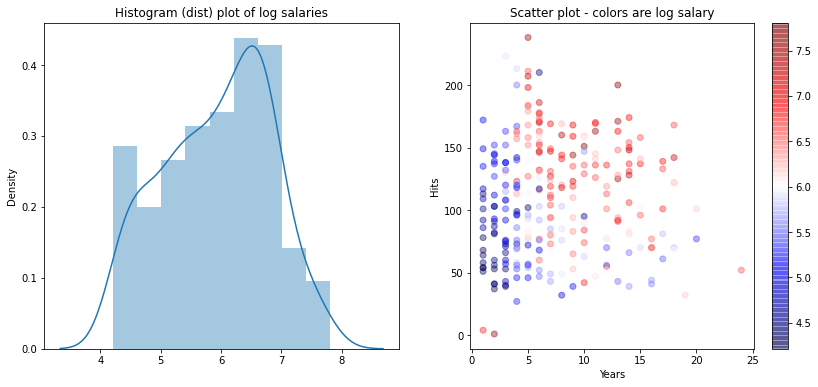

In [48]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(func = np.log, inverse_func= np.exp)
y = transformer.transform(hitters.Salary.values.reshape(-1,1))
X = hitters[['Years','Hits']]

fig = plt.figure(figsize = (14,6))
ax = plt.subplot(121)
ax = sns.distplot(y)
ax.set_title('Histogram (dist) plot of log salaries')

ax = plt.subplot(122)
ax.set_xlabel('Years')
ax.set_ylabel('Hits')
ax.set_title('Scatter plot - colors are log salary')

ax2 = ax.scatter(hitters.Years, hitters.Hits, alpha = .4, c = y.flatten(), cmap = 'seismic')
plt.colorbar(ax2)

plt.show

**Train simple regression tree**

In [49]:
from sklearn.tree import DecisionTreeRegressor
simple_tree = DecisionTreeRegressor(random_state = 0, max_depth = 2, max_leaf_nodes=3)
simple_tree.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=3,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

**A simple regression tree for the Hitters data**

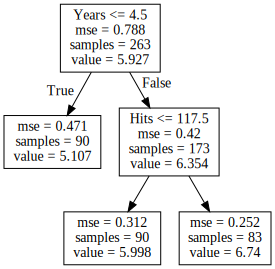

In [50]:
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(simple_tree, out_file=None, feature_names = ['Years','Hits'], class_names = ['Salary'])  
graph = graphviz.Source(dot_data)  
graph 

### Please answer the questions below to complete the experiment:




In [52]:
#@title Q.1. State if True or False: Seaborn sets time for the creation of each figure and it never leads to (OOM) out of memory issues (5 points).  { run: "auto", form-width: "500px", display-mode: "form" }
Answer1 = "False" #@param ["","True", "False"]


In [53]:
#@title Q.2. State if True or False: Matplotlib is highly customized and Seaborn is a Python data visualization library based on matplotlib (5 points).
Answer2 = "True" #@param ["","True", "False"]


In [54]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [55]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Nothing to add now" #@param {type:"string"}


In [56]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [57]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [58]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [59]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1019
Date of submission:  13 Jul 2021
Time of submission:  20:26:53
View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions
